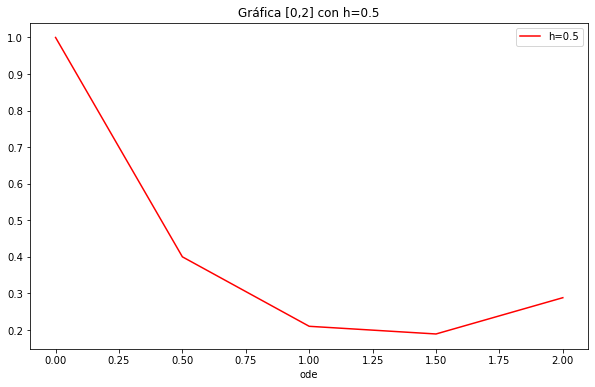

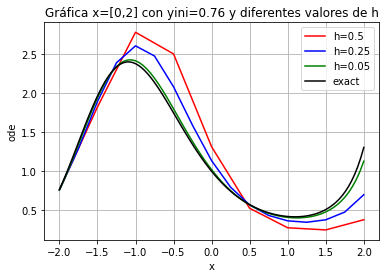

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    fxy=y*x**2 - 1.2*y 
    return fxy

h=0.5
intrange=[0, 2]
yini=1

def euler(f, intrange, h, yini):
    x=np.arange(intrange[0], intrange[1]+h, h)
    y=np.zeros(len(x)) 
    y[0]=yini
    for i in range(0, len(x)-1):
        y[i+1] = y[i] + f(x[i],y[i])*h
        
    return x, y


intrange=[0,2.0]
h=0.5
yinit=1
x1,y1=euler(f,intrange,h,yinit)
plt.figure(figsize=(10,6))
plt.plot(x1,y1,'-r',label='h=0.5')
plt.xlabel('x')
plt.xlabel('ode')
plt.title('Gráfica [0,2] con h=0.5')
plt.legend()
plt.grid

        
fig,ax=plt.subplots(1,1)

intrange=[-2.0,2.0]
h=0.5
yinit=0.76
x1,y1=euler(f,intrange,h,yinit)
ax.plot(x1,y1,'-r',label='h=0.5')

intrange=[-2.0,2.0]
h=0.25
yinit=0.76
x2,y2=euler(f,intrange,h,yinit)
ax.plot(x2,y2,'-b',label='h=0.25')

intrange=[-2.0,2.0]
h=0.05
yinit=0.76
x3,y3=euler(f,intrange,h,yinit)
ax.plot(x3,y3,'-g',label='h=0.05')

xexact=np.linspace(intrange[0],intrange[-1],101)
yexact=np.exp((xexact**3)/3-1.2*xexact)
ax.plot(xexact,yexact,'-k',label='exact')

ax.set_xlabel('x')
ax.set_ylabel('ode')
ax.legend()
ax.set_title('Gráfica x=[0,2] con yini=0.76 y diferentes valores de h')
ax.grid()

In [3]:
def derivs(x, y):
    return 1-y-y**3
 
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta45(x0, y0, xfin, h):
    yout=[]
    xout=[]
    # Count number of iterations using step size or
    # step height h
    n = (int)((xfin - x0)/h)
    # Iterate for number of iterations
    y = y0
    yout.append(y)
    xout.append(x0)
    for i in range(1, n + 1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * derivs(x0, y)
        k2 = h * derivs(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * derivs(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * derivs(x0 + h, y + k3)
 
        # Update next value of y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        yout.append(y)
        # Update next value of x
        x0 = x0 + h
        xout.append(x0)
    return xout,yout

xini=-10
y0=0
xfin=-5
h=0.05

t_span=[-10,-5]
myt_eval=np.linspace(-10,-5,100) # opcional
y00=[0]

Sol_sis = rungeKutta45(xini, y0, xfin, h)

sol = solve_ivp(derivs, t_span, y00, method='RK23', t_eval=myt_eval)
plt.plot(Sol_sis[0] ,Sol_sis[1],'b', label='Runge-Kutta 4')
plt.plot(sol.t,sol.y[0],'.r',label='scipy.integrate.solve_ivp')
plt.grid()
plt.title('Gráfica con y inicial =0')
plt.xlabel('x')
plt.ylabel('ode')
plt.legend()

NameError: name 'solve_ivp' is not defined